In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def u(x, y,x0,y0,sigma):
    X = np.array([x,y])
    X0 = np.array([x0,y0]) 
    return 1. - np.exp(-np.linalg.norm(X-X0)**2/2/sigma)

In [3]:
#attractor 1:
x1 = -2; y1 =0;
#attractor 2:
x2 = 2; y2=0;

sigma = 1

oneDgrid = np.linspace(-10, 10, 41)

x = oneDgrid
y = oneDgrid

X, Y = np.meshgrid(x, y)
U = np.vectorize(u) # this is probably making the code slower
Z = U(X, Y, x1, y1, sigma)*U(X, Y, x2, y2, sigma)

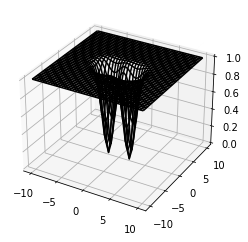

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='Black');

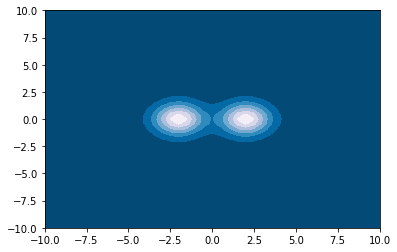

In [5]:
plt.contourf(X, Y, Z, cmap='PuBu')
plt.show()

In [6]:
# gradient

def grad(x, y,x1,y1,x2,y2,sigma):
    term1 = u(x, y, x2, y2, sigma)*(u(x, y, x1, y1, sigma) -1)*(np.array([x,y])-np.array([x1,y1]))
    term2 = u(x, y, x1, y1, sigma)*(U(x, y, x2, y2, sigma) -1)*(np.array([x,y])-np.array([x2,y2]))
    return -(term1 + term2)/sigma**2

def gradX(x, y,x1,y1,x2,y2,sigma):
    return grad(x, y,x1,y1,x2,y2,sigma)[0]

def gradY(x, y,x1,y1,x2,y2,sigma):
    return grad(x, y,x1,y1,x2,y2,sigma)[1]

In [7]:
#attractor 1:
x1 = -2; y1 =0;
#attractor 2:
x2 = 2; y2=0;

oneDgrid = np.linspace(-10, 10, 41)

x = oneDgrid
y = oneDgrid

X, Y = np.meshgrid(x, y)
VGradX = np.vectorize(gradX)
VGradY = np.vectorize(gradY)

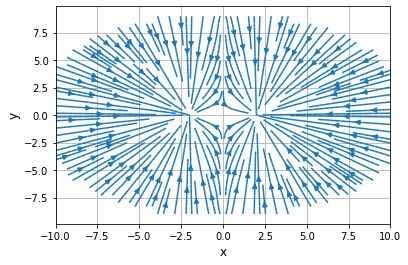

In [11]:
dx1dt = -VGradX(X,Y,x1,y1,x2,y2,sigma)
dx2dt = -VGradY(X,Y,x1,y1,x2,y2,sigma)
plt.streamplot(X, Y, dx1dt, dx2dt,density = 2)
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.grid(); plt.show()